In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
File='/content/drive/MyDrive/assignment3/train.zip (Unzipped Files)/train'

In [ ]:
myfolder=os.listdir(File) #to get all the subfolders inside a folder
print(myfolder)

['kangaroo', 'car_side', 'sunflower']


In [ ]:
train_kangaroo=[]
train_car_side=[]
train_sunflower=[]
for folder in myfolder:
  path=File+'/'+folder
  print(path) #to get path of all the folders
  MyImages=os.listdir(path) # to get all the files in all the subfolders inside a folder
  #print(MyImages)
  if 'assignment3/train.zip (Unzipped Files)/train/kangaroo' in path: #{
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       temp_img = cv2.resize(temp_img,(224,224)) #resizing because images are of different size and it won't give an array but a list
       train_kangaroo.append(temp_img)                                
  if 'assignment3/train.zip (Unzipped Files)/train/car_side' in path: #sorting images into different lists as per their folders
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       temp_img = cv2.resize(temp_img,(224,224))
       train_car_side.append(temp_img)
  if 'assignment3/train.zip (Unzipped Files)/train/sunflower' in path:
     for img in MyImages:
       temp_img=cv2.imread(f'{path}/{img}',cv2.IMREAD_GRAYSCALE)
       temp_img = cv2.resize(temp_img,(224,224))
       train_sunflower.append(temp_img)                

/content/drive/MyDrive/assignment3/train.zip (Unzipped Files)/train/kangaroo
/content/drive/MyDrive/assignment3/train.zip (Unzipped Files)/train/car_side
/content/drive/MyDrive/assignment3/train.zip (Unzipped Files)/train/sunflower


In [ ]:
train_kangaroo=np.array(train_kangaroo)
train_car_side=np.array(train_car_side)
train_sunflower=np.array(train_sunflower)

In [ ]:
train_sunflower.shape

(50, 224, 224)

In [ ]:
y_train_kangaroo=np.zeros(50)
y_train_car_side=np.ones(50)
y_train_sunflower=2*np.ones(50)

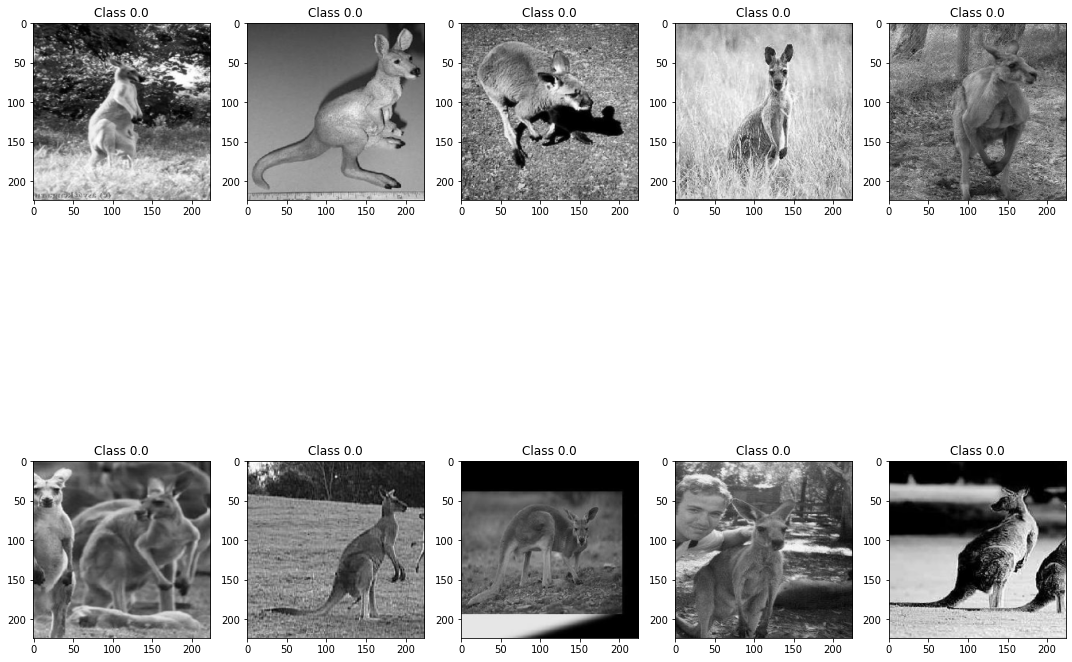

In [ ]:
import random
#iX_train=X_train.reshape(150,224,224)
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger
for i in range(10):
  plt.subplot(2,5,i+1)
  num = random.randint(0,50)
  #plt.imshow(train_kangaroo[num])
  plt.imshow(cv2.cvtColor(train_kangaroo[num], cv2.COLOR_BGR2RGB))
  plt.title("Class {}".format(y_train_kangaroo[num]))
plt.tight_layout()

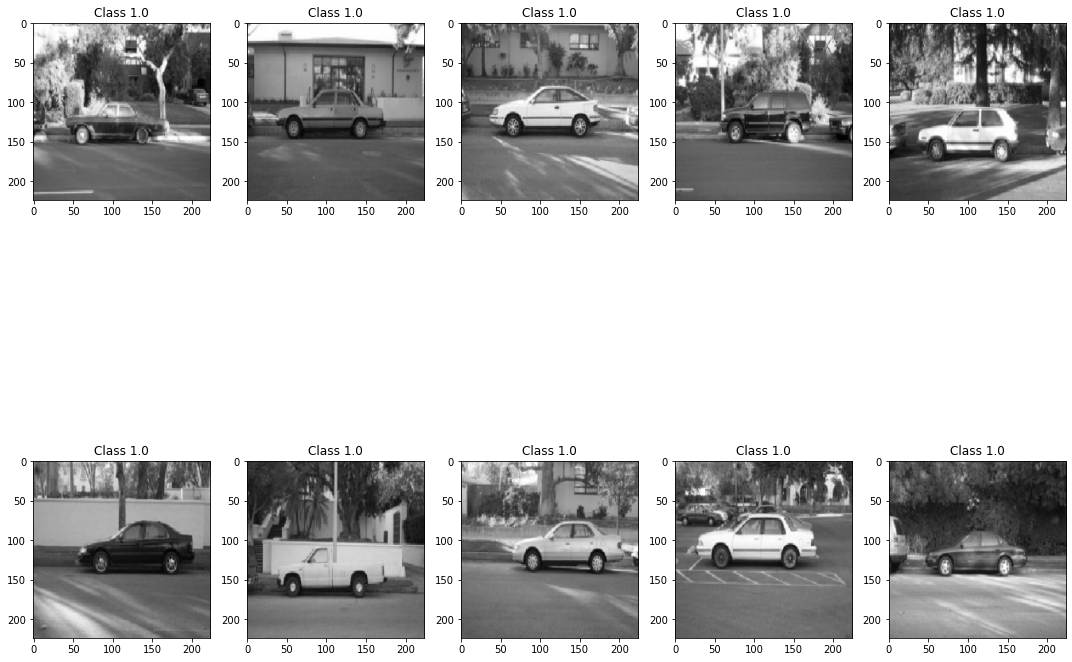

In [ ]:
import random
#iX_train=X_train.reshape(150,224,224)
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger
for i in range(10):
  plt.subplot(2,5,i+1)
  num = random.randint(0,50)
  #plt.imshow(train_kangaroo[num])
  plt.imshow(cv2.cvtColor(train_car_side[num], cv2.COLOR_BGR2RGB))
  plt.title("Class {}".format(y_train_car_side[num]))
plt.tight_layout()

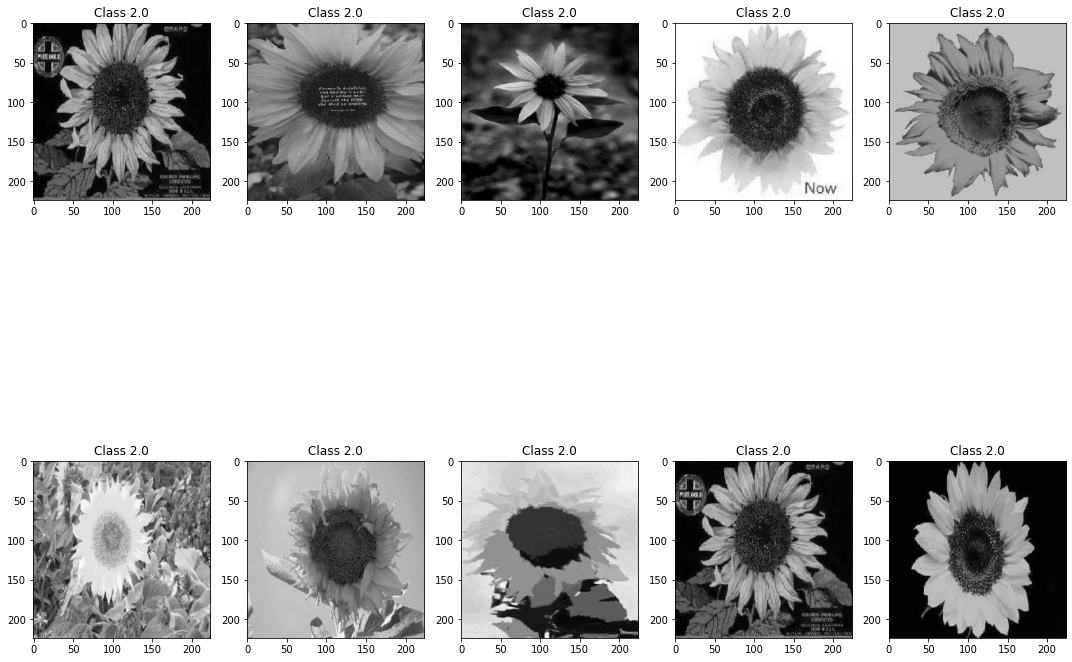

In [ ]:
import random
#iX_train=X_train.reshape(150,224,224)
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger
for i in range(10):
  plt.subplot(2,5,i+1)
  num = random.randint(0,50)
  #plt.imshow(train_kangaroo[num])
  plt.imshow(cv2.cvtColor(train_sunflower[num], cv2.COLOR_BGR2RGB))
  plt.title("Class {}".format(y_train_sunflower[num]))
plt.tight_layout()

In [ ]:
def kaiming(n, size):
    mean, sd = 0, np.sqrt(2/n)
    weights = np.random.normal(mean, sd, size=size)
    return weights


In [ ]:
np.random.seed(25)
n = 1
filter = kaiming(n, (3, 3))
print('Filter Matrix')
print(filter)

Filter Matrix
[[ 0.3228269   1.45224219 -1.18735228]
 [-0.83605692 -1.35324441 -0.31441601]
 [-0.87669235  2.59918958 -2.90370678]]


In [ ]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [ ]:
size=calculate_target_size(224,3)

In [ ]:
size

222

In [ ]:
subset=np.array(train_kangaroo[5][0:0+3,0:0+3])
subset

array([[18, 43, 26],
       [30, 39, 40],
       [50, 38, 39]], dtype=uint8)

In [ ]:
mul=np.multiply(subset,filter)

In [ ]:
np.sum(mul)

-111.35871881226473

In [ ]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

In [ ]:
img_sf=convolve(train_sunflower[5],filter)

In [ ]:
img_sf.shape

(222, 222)

In [ ]:
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1,cmap='gray')
    ax[1].imshow(img2,cmap='gray');

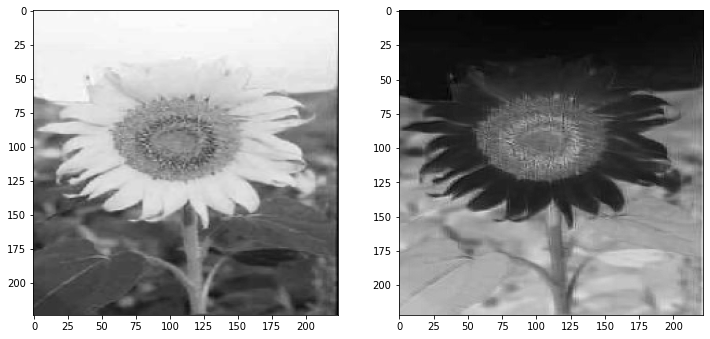

In [ ]:
plot_two_images(
    img1=train_sunflower[5], 
    img2=img_sf
)

In [ ]:
img_kan=convolve(train_kangaroo[7],filter)

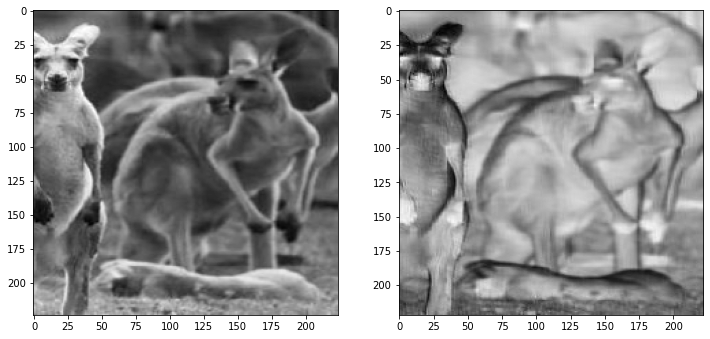

In [ ]:
plot_two_images(
    img1=train_kangaroo[7], 
    img2=img_kan
)

In [ ]:
img_cs=convolve(train_car_side[22],filter)

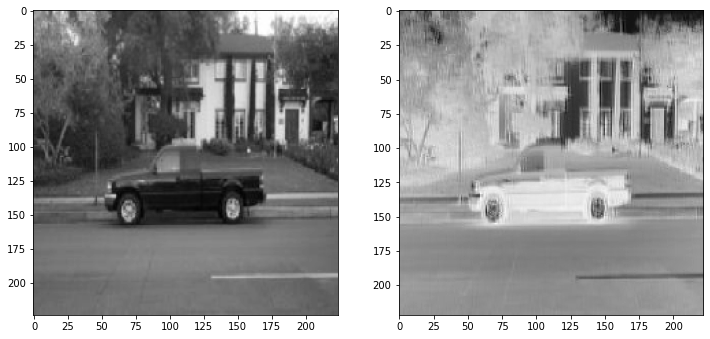

In [ ]:
plot_two_images(
    img1=train_car_side[22], 
    img2=img_cs
)

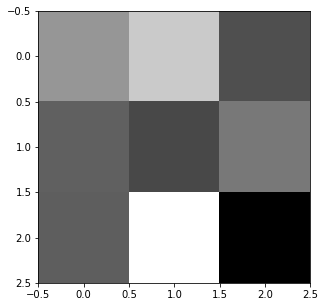

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
k=plt.imshow(filter,cmap='gray')
